In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
stroke_df = pd.read_csv("stroke_data.csv")
stroke_df = stroke_df.drop('id', axis = 1)

In [3]:
stroke_df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
stroke_df.shape

(5110, 11)

In [5]:
stroke_df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [6]:
#Frequency Count for target variable 
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Observations: 1) This dataset is unblanced which will end up skewing our model's results. We will deal with this later on; 2) We have some missing values in the 'bmi' feature. We will have to deal with this as well. 

## Exploratory Data Analysis (EDA)

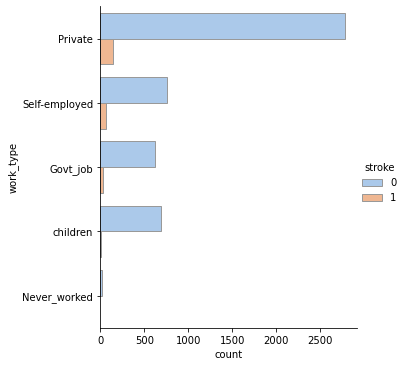

In [8]:
sns.catplot(y = 'work_type', hue = 'stroke', kind = 'count', palette = 'pastel', edgecolor = '.6', data = stroke_df )

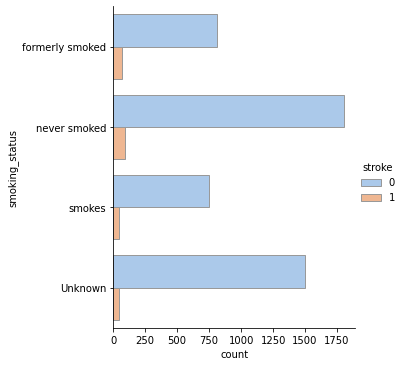

In [9]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=stroke_df)

<Figure size 1224x504 with 0 Axes>

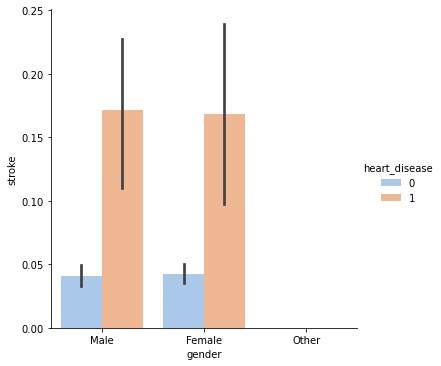

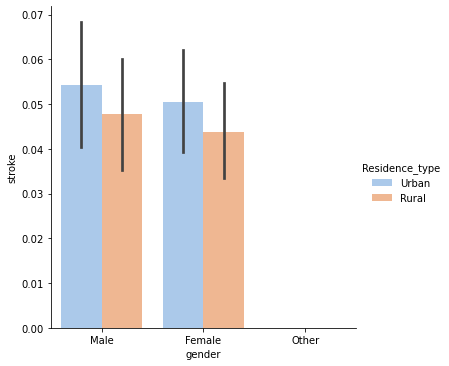

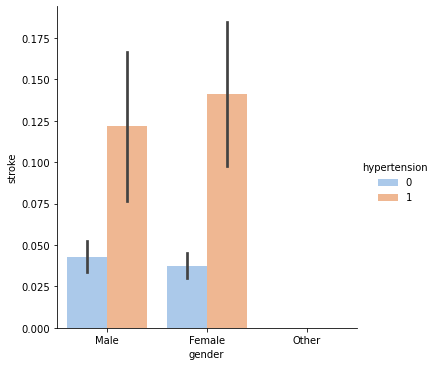

In [10]:
plt.figure(figsize = (17,7)) 
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=stroke_df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=stroke_df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=stroke_df)
plt.show()

<AxesSubplot:>

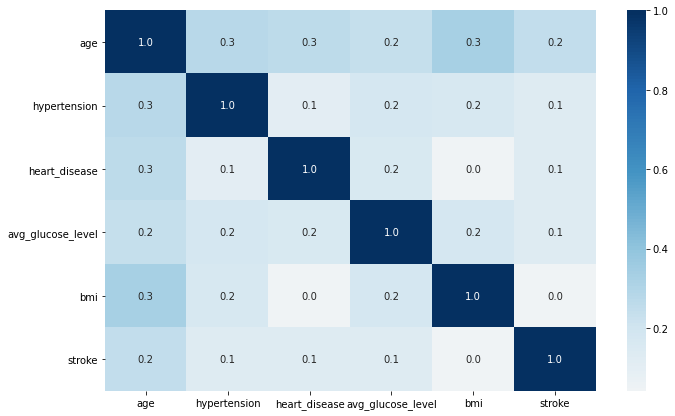

In [11]:
corr = stroke_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'RdBu', center = 0, ax = ax)


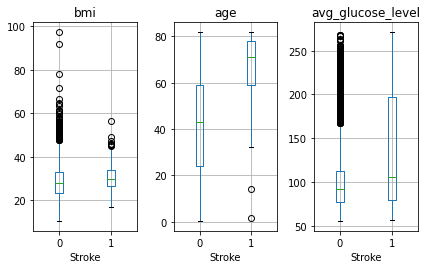

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3)
stroke_df.boxplot(column = 'bmi', by = 'stroke', ax = axes[0])
stroke_df.boxplot(column = 'age', by = 'stroke', ax = axes[1])
stroke_df.boxplot(column = 'avg_glucose_level', by = 'stroke', ax = axes[2])


for ax in axes:
    ax.set_xlabel('Stroke')
    
plt.suptitle('')
plt.tight_layout()

Observations:

1) Gender is not a feature that determines whether a person has a stroke or not

2) There's a high correlation between the hypertension variable and stroke

3) Suprisngly, it seems like smokers aren't at a high risk to have a stroke 

## Data Cleaning & Preperation 

In [13]:
le = LabelEncoder()
en_df = stroke_df.apply(le.fit_transform)

In [14]:
en_df_imp = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imp)

array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 418.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
X = en_df_imp.drop(['stroke'], axis = 1)
y = en_df_imp['stroke']

In [17]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

## Splitting Data & Running Model

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)


In [20]:
train_pred = clf.predict(X_train)
val_pred = clf.predict(X_valid)

In [21]:
print("Training recall: ", metrics.recall_score(y_train, train_pred))
print("Validation recall: ", metrics.recall_score(y_valid, val_pred))

print("\n")

print("Training precision: ", metrics.precision_score(y_train, train_pred))
print("Validation precision: ", metrics.precision_score(y_valid, val_pred))

print("\n")

print("Training accuracy: ", metrics.accuracy_score(y_train, train_pred))
print("Validation accuracy: ", metrics.accuracy_score(y_valid, val_pred))

print("\n")

y_train_prob = clf.predict_proba(X_train)
y_val_prob = clf.predict_proba(X_valid)

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
print("Training AUC: ", metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_val_prob[:,1], pos_label = 1)
print("Validation AUC: ", metrics.auc(fpr, tpr))

Training recall:  1.0
Validation recall:  0.9452054794520548


Training precision:  1.0
Validation precision:  0.9049180327868852


Training accuracy:  1.0
Validation accuracy:  0.9228659581762084


Training AUC:  1.0
Validation AUC:  0.9765936292438018


In [25]:
## Create a data frame with the feature importances
###################################################
# First create an empty data frame
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = X_train.columns

# add a column with the feature importances
imp["imp"] = clf.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,age,0.389448
1,avg_glucose_level,0.206592
2,bmi,0.151511
3,work_type,0.078578
4,smoking_status,0.051277
5,Residence_type,0.037387
6,gender,0.033315
7,ever_married,0.023298
8,hypertension,0.015906
9,heart_disease,0.012689
